created by **Farah Rabie** (fr2007@hw.ac.uk)

#### Notebook 1 $\,\,\,\,\,$ Data Visualisation in 2D

This notebook is an introduction to 2D well data visualisation. **Four tasks** are included in this notebook:

- Load petrophysical data from a comma-separated values (*.csv*) file into a Pandas DataFrame.
- Calculate petrophysical parametersf the well, including *Total Porosity* ($PHI_F$) and *Horizontal Log Permeability* ($KLOGH$).
- Create the *($KLOGH$)* and *$(PHI_F)$* line logs for the well.
- Create the *$(KLOGH)$ vs $(PHI_F)$* scatter plot for the well.

The data in this notebook is from **well 15_9-F-1 B** of the Equinor Volve Field dataset.

#### Import Libraries  

We always start off with <span style="color:purple"> *importing the required Python libraries* </span>. A python library is a collection of modules (or packages) that provide pre-written code to perform specific tasks or functions. In this notebook, we are importing the following libraries:

**Pandas**

This is a Python library for data manipulation and analysis, offering data structures like *DataFrame* and *Series*. It includes a wide range of functions for data cleaning, reshaping, merging, and analysis. This library is extensively used in data science and analysis projects because of its efficiency in managing structured data.

**NumPy**

This a Python library for numerical computing, supporting multidimensional arrays, mathematical functions, linear algebra operations, random number generation, and more. This library is an essential component in scientific computing and data analysis.

**Pyplot**

This is a sub-module of **Matplotlib**, another Python library. This sub-module is a go-to tool for data visualisation in Python, providing a MATLAB-like interface for creating plots and visualizations. 



To use a library (or module) in Python, you first need to import it. You can import a module using the *import* statement, and you can also assign it an alias with the *as* keyword for easier reference. For example,

In [1]:
import pandas as pd # for data manipulation

imports the *Pandas* library. Using its alias *pd*, you can refer to it throughout the code. Let us import the remaining Python libraries.

In [2]:
import numpy as np # for numerical computing and array manipulation tasks
import matplotlib.pyplot as plt # for data visualisation (includes setting font sizes)

#### Task 1$\,\,\,\,\,$Load Data for Well 15_9-F-1 B

The <span style="color:purple"> *read_csv* function from Pandas allows us to efficiently import data from a *.csv* file into a *Pandas DataFrame* </span>. Let us load the data into a Pandas DataFrame named **well_1_B_data**.

In [3]:
well_1_B_data = pd.read_csv('combined logs/15_9-F-1 B/15_9-F-1 B_well-info.csv') # load data into DataFrame

Similar to tables or spreadsheets in other programming languages, *Pandas DataFrames* consist of rows and columns, where each column can contain different types of data (e.g., integers, floats, strings) and is labelled with a unique name.

Once the data is loaded, we can <span style="color:purple"> inspect its contents using the *.head()* method </span>. This method displays the first five rows of the dataframe along with the header row, providing an overview of the structure of the dataset.

In [4]:
well_1_B_data.head() # display first five rows of well_1_B_data DataFrame

,DEPTH,GR,NPHI,RHOB,RT,DT
0,145.9,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,NaN


The **well_1_B_data** DataFrame contains the following columns:

- **DEPTH** (in metres):  Depth measurements, indicating the vertical position within the geological formation being analysed.

- **GR** (in API units):  Gamma ray logs, crucial for distinguishing between different lithologies in the formation.

- **NPHI** (no unit):  Neutron Porosity logs, useful for estimating the porosity of the rock formation.

- **RHOB** (in g/cm³):  Bulk Density measurements, essential for calculating total porosity and understanding the lithology of the formation.

- **RT** (in Ω·m): Resistivity logs, which indicate how easily electric current can flow through the formation, and help us identify fluid types and saturation in the well.

- **DT** (in µs/m): Sonic Travel Time logs, useful for determining rock elastic properties and porosity.

To <span style="color:purple"> display a concise summary of the **well_1_B_data** DataFrame, we can use the *.info()* method </span>.

In [5]:
well_1_B_data.info(verbose=True) # print information of all columns in well_1_B_data DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33191 entries, 0 to 33190
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   33191 non-null  float64
 1   GR      32498 non-null  float64
 2   NPHI    3413 non-null   float64
 3   RHOB    3441 non-null   float64
 4   RT      8538 non-null   float64
 5   DT      4262 non-null   float64
dtypes: float64(6)
memory usage: 1.5 MB


Notice how the non-null count varies along the columns of the **well_1_B_data** DataFrame - <span style="color:red"> why is that? </span> <br> <span style="color:green"> Since well measurements are taken at irregular intervals, there may be instances where certain measurements are missing. </span> 

Here, we can <span style="color:purple"> use the *.dropna()* method to remove any rows containing NaN values  </span>, ensuring that our dataset is complete and ready for analysis. This step is crucial for maintaining data integrity and preventing errors during calculations and visualisations.

In [6]:
well_1_B_data.dropna(inplace=True) # remove any rows with missing values (NaN) from well_1_B_data DataFrame 

After removing NaN values from the **well_1_B_data** DataFrame, we can <span style="color:purple"> use the *.describe()* method to obtain a statistical summary of the numerical columns in the dataset </span>. 

In [7]:
well_1_B_data.describe() # generate summary statistics of well_1_B_data DataFrame 

,DEPTH,GR,NPHI,RHOB,RT,DT
count,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000
mean,3261.550000,72.114748,0.204948,2.452392,4.094482,84.236379
std,94.180262,61.620067,0.097875,0.133218,13.106691,14.488617
min,3098.500000,8.002000,0.059500,2.111800,0.200000,58.632000
25%,3180.025000,38.552250,0.146300,2.364200,1.300000,74.450500
50%,3261.550000,50.796000,0.172400,2.483300,1.700000,81.408000
75%,3343.075000,64.980500,0.225450,2.539875,2.300000,88.037250
max,3424.600000,297.767000,0.557600,3.051700,134.700000,125.983000


Before moving on to the next task, let us <span style="color:purple"> extract the different columns from the **well_1_B_data** DataFrame and convert them into NumPy arrays </span>. This is helpful for task 2.

In [8]:
well_1_B_DEPTH = well_1_B_data['DEPTH'].values
well_1_B_GR = well_1_B_data['GR'].values
well_1_B_NPHI = well_1_B_data['NPHI'].values
well_1_B_RHOB = well_1_B_data['RHOB'].values
well_1_B_RT = well_1_B_data['RT'].values

#### Task 2$\,\,\,\,\,$ Calculate Total Porosity ($PHI_F$) and Horizontal Log Permeability ($KLOGH$)

We can now use the previously extracted NumPy arrays to compute the *Total Porosity* ($PHI_F$) and *Horizontal Log Permeability* ($KLOGH$) for **well 15_9-F 1 B**. These computations rely on specific equations outlined in the petrophysical report (pages 10 and 12, available under References), which provide a comprehensive framework for analysing the well data. 

The first step is to <span style="color:purple"> calculate the Density Porosity ($PHI_D$) </span>, using the formula:
$$PHI_D = \frac{\rho_{\text{ma}} - \rho_b}{\rho_{\text{ma}} - \rho_{\text{fl}}}$$

In [9]:
rho_ma = 2.65 # matrix density (g/cm**3)
rho_fl = 0.9 # pore fluid density (g/cm**3)
rho_b = well_1_B_RHOB # measured bulk density (g/cm**3)
PHI_D = (rho_ma - rho_b)/(rho_ma - rho_fl)

$PHI_D$ represents the porosity derived from the bulk density measurements.

The <span style="color:purple"> total porosity, $PHI_F$, is computed </span> as:
$$PHI_F = PHI_D + A \times (NPHI - PHI_D) + B$$

In [10]:
A = 0.4 # regression coefficient
NPHI = well_1_B_NPHI # neutron log
B = 0.01
PHI_F = PHI_D + A*(NPHI - PHI_D) + B

Next, we <span style="color:purple"> compute the shale volume ($VSH$) </span> using the following expression:
$$VSH = \frac{GR - GR_{\text{min}}}{GR_{\text{max}} - GR_{\text{min}}}$$

In [11]:
GR = well_1_B_GR # gamma ray log reading (API)
GR_min = 7 # gamma ray reading in clean sand (API)
GR_max = 120 # gamma ray reading in shale (API)
VSH = (GR - GR_min)/(GR_max - GR_min)

$VSH$ provides insight into the proportion of the rock that is shale.

Finally, the <span style="color:purple"> horizontal log permeability, $KLOGH$, is determined </span> using:
$$KLOGH = 10^{\left(2 + 8 \times PHI_F - 9 \times VSH\right)}$$

In [12]:
KLOGH = 10**(2 + (8*PHI_F) - (9*VSH))

Now that we have computed $PHI_F$ and $KLOGH$, we can move on to task 3, where we visualise these properties as a function of $DEPTH$.

#### Task 3$\,\,\,\,\,$ Create $PHI_F$ and $KLOGH$ Line Logs

Visualising the data will allow us to gain deeper insights into the patterns, trends, and relationships between the petrophysical parameters of the dataset. The *.plot()* method is used to create various types of plots from data stored in NumPy arrays. 

Here, we will be <span style="color:purple"> using the .plot() method to visualise $PHI_F$ and $KLOGH$ against $DEPTH$ with line plots</span>.

C:\Users\fr2007\AppData\Local\Temp\ipykernel_43364\1141899158.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(3, 3), loc=(0, 0), rowspan=3, colspan=1)


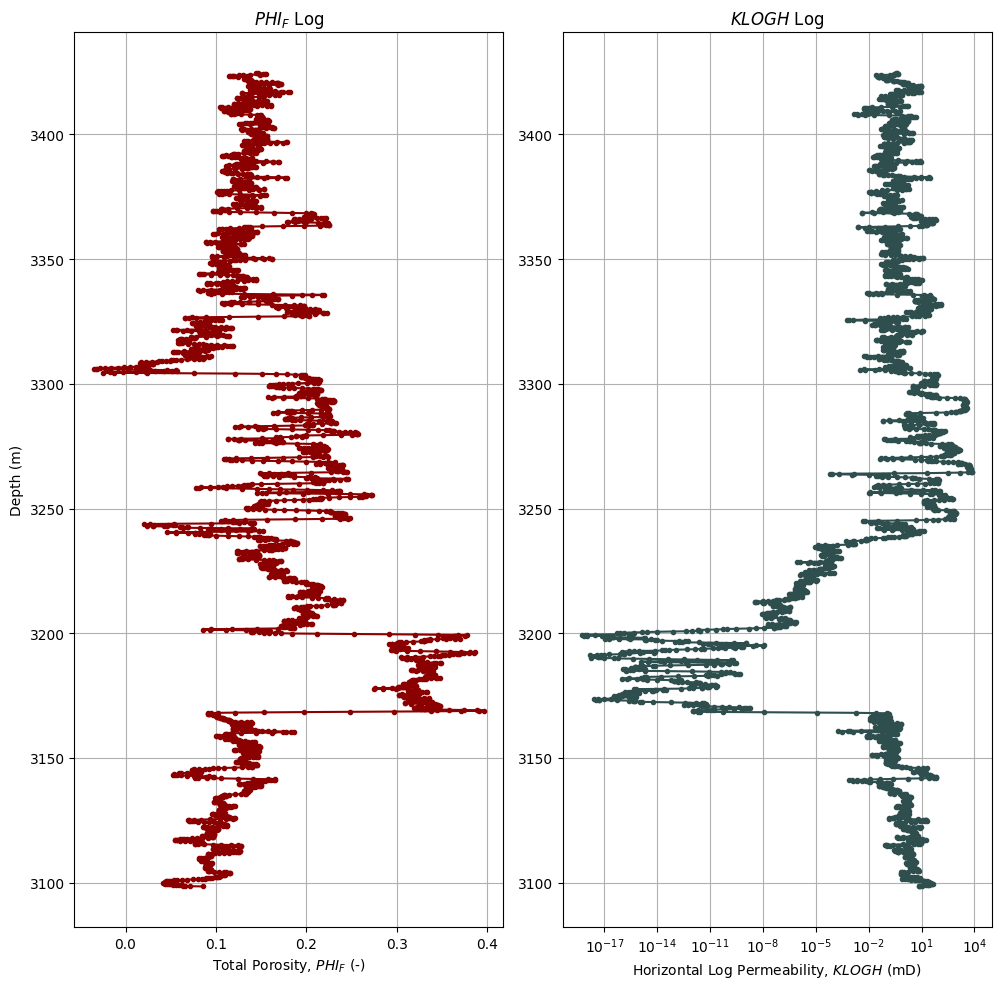

In [15]:
fig, ax = plt.subplots(figsize=(15, 10)) # create figure

# add the subplots using subplot2grid
ax1 = plt.subplot2grid(shape=(3, 3), loc=(0, 0), rowspan=3, colspan=1) 
ax2 = plt.subplot2grid(shape=(3, 3), loc=(0, 1), rowspan=3)

# for ax1, show PHI_F vs DEPTH as a line plot
ax1.plot(PHI_F, well_1_B_DEPTH, marker='.', color='darkred')
ax1.set_xlabel('Total Porosity, $PHI_F$ (-)')  # label for the x-axis
ax1.set_ylabel('Depth (m)')  # label for the y-axis
ax1.set_title('$PHI_F$ Log')
ax1.grid()

# for ax2, show KLOGH vs DEPTH as a line plot
ax2.plot(KLOGH, well_1_B_DEPTH, marker='.', color='darkslategray')
ax2.semilogx()
ax2.set_xlabel('Horizontal Log Permeability, $KLOGH$ (mD)') 
ax2.set_title('$KLOGH$ Log')
ax2.grid()

plt.tight_layout()
plt.show()

# If you want to save the figure, un-comment the following line
#plt.savefig('Porosity_and_Permeability_log_plots.pdf', dpi=300)

To improve the readibility and interpretability of the plot, we <span style="color:purple"> added *gridlines* using the method *.grid(True)* </span>. We can <span style="color:purple"> set clear *labels* for the $x$ and $y$ axes using the *.set_xlabel* and *.set_ylabel* methods </span> respectively. Plots can be saved in different formats - here, you have the <span style="color:purple"> option to save them as *.pdf* files </span>.

Notice how <span style="color:purple"> the $x$-axis for the $KLOGH$ Log plot is in a *logarithmic scale* </span>. A logarithmic scale is useful when the data spans several orders of magnitude. In this case, a semi-logarithmic plot allows for better visualisation of data - it highlights smaller values of permeability, making it easier to interpret trends in the data without compressing the overall view.

<span style="color:red"> Based on these plots, can you make any observations? </span>

#### Task 4$\,\,\,\,\,$ Create $PHI_F$ vs $KLOGH$ Scatter Plot

In this last task, we are visualing the relationship between $PHI_F$ and $KLOGH$. We can <span style="color:purple"> generate a scatter plot using the *.scatter* method, with the variable $PHI_F$ on the $x$-axis and the variable $KLOGH$ on the $y$-axis </span>. 

In [ ]:
fig, ax = plt.subplots() # create a figure and axes
ax.scatter(PHI_F, KLOGH, color='slateblue', marker='o') 
#plt.savefig('Semi-log-PHI_F-KLOGH-scatter-plot.pdf', dpi=600)

<span style="color:red"> Can you modify the code to include the following? </span>
- A logarithmic transformation to the y-axis
- Gridlines for better readability
- Labels for x-axis and y-axis

**Reference**

- Equinor, A. S. A. (2023). Volve field data set.
- Andy McDonald. (2020). Petrophysics-Python-Series/11 - Poro-Perm Relationships.ipynb at master · andymcdgeo/Petrophysics-Python-Series. GitHub. https://github.com/andymcdgeo/Petrophysics-Python-Series/blob/master/11%20-%20Poro-Perm%20Relationships.ipynb